# Natural Language Processing - Topic Modeling

It is the application of unsupervised learning/clustering on a collection of documents to identify the topics/themes in it.

## Load Dataset

In [1]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
import seaborn as sns

# LOAD DATA
reviews = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/DisneylandReviews.csv', encoding='latin-1')
reviews = reviews.dropna()
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


## Preprocessing

In [3]:
# DATA CLEANING AND PRE PROCESSING


# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [4]:
import re

def text_preprocessing(text):
    '''
    Remove unwanted characters,
    stopwords, and format the text to
    create fewer nulls word embeddings
    '''

    # Convert words to lower case
    text = text.lower()

    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
              # note that contractions is a dictionary
              new_text.append(contractions[word])
            else:
              new_text.append(word)
        text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\'', ' ', text)

    # this line of code is used to remove URLs from the text variable.
    # It searches for patterns that match common URL formats
    # (starting with "http" or "https" and containing the "://" delimiter)
    # and replaces them with an empty string, effectively deleting the URLs
    # from the text. The use of re.MULTILINE ensures that it operates on each
    # line of the text separately.

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]

    # For each token in the text, the code applies lemmatization using the WordNetLemmatizer.
    # The lemmatize function is used to find the base or dictionary form of a word (the lemma).
    # The pos='v' argument specifies that it should lemmatize the token as a verb.


    return text

In [5]:
def to_string(text):
    # Convert list to string
    text = ' '.join(map(str, text))

    return text

# Create a list of review by applying text_preprocessing function
reviews['Review_Clean_List'] = list(map(text_preprocessing, reviews.Review_Text))

# list comprehension that processes each element in the 'Review_Text'
# column using the 'text_preprocessing' function.
# The map function applies the 'text_preprocessing' function to each
# element in the 'Review_Text' column of the 'reviews' DataFrame.
# This effectively applies the 'text_preprocessing'
# function to each text review in the 'Review_Text' column.


# Return to string with to_string function
reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [6]:
reviews['Review_Text'].apply(text_preprocessing)

0        [if, you, ve, ever, be, to, disneyland, anywhe...
1        [its, be, while, since, last, time, we, visit,...
2        [thank, god, it, wasn, too, hot, or, too, humi...
3        [hk, disneyland, be, great, compact, park, unf...
4        [the, location, be, not, in, the, city, take, ...
                               ...                        
42651    [go, to, disneyland, paris, in, july, 03, and,...
42652    [adults, and, child, of, 11, visit, disneyland...
42653    [my, eleven, year, old, daughter, and, myself,...
42654    [this, hotel, part, of, the, disneyland, paris...
42655    [go, to, the, disneyparis, resort, in, 1996, w...
Name: Review_Text, Length: 42656, dtype: object

In [8]:
stopwords_list = stopwords.words('english')
stopwords_list.extend(['park', 'disney', 'disneyland'])

In [9]:
reviews['Review_Clean_List'] = [[word for word in line if word not in stopwords_list] \
                                for line in reviews['Review_Clean_List']]

reviews['Review_Clean'] = list(map(to_string, reviews['Review_Clean_List']))

In [10]:
reviews

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Clean_List,Review_Clean
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[ever, anywhere, find, hong, kong, similar, la...",ever anywhere find hong kong similar layout wa...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[since, last, time, visit, hk, .., yet, time, ...",since last time visit hk .. yet time stay tomo...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, hot, humid, visit, otherwise, wou...",thank god hot humid visit otherwise would big ...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, great, compact, unfortunately, quite, bit...",hk great compact unfortunately quite bite main...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[location, city, take, around, hour, kowlon, k...",location city take around hour kowlon kid like...
...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,"[go, paris, july, 03, think, brilliant, visit,...",go paris july 03 think brilliant visit hotels ...
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,"[adults, child, 11, visit, paris, begin, feb, ...",adults child 11 visit paris begin feb 04 absol...
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,"[eleven, year, old, daughter, go, visit, son, ...",eleven year old daughter go visit son london d...
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,"[hotel, part, paris, complex, wonderful, place...",hotel part paris complex wonderful place famil...


### Term Frequency-Inverse Document Frequency (TFIDF) Vectorizer

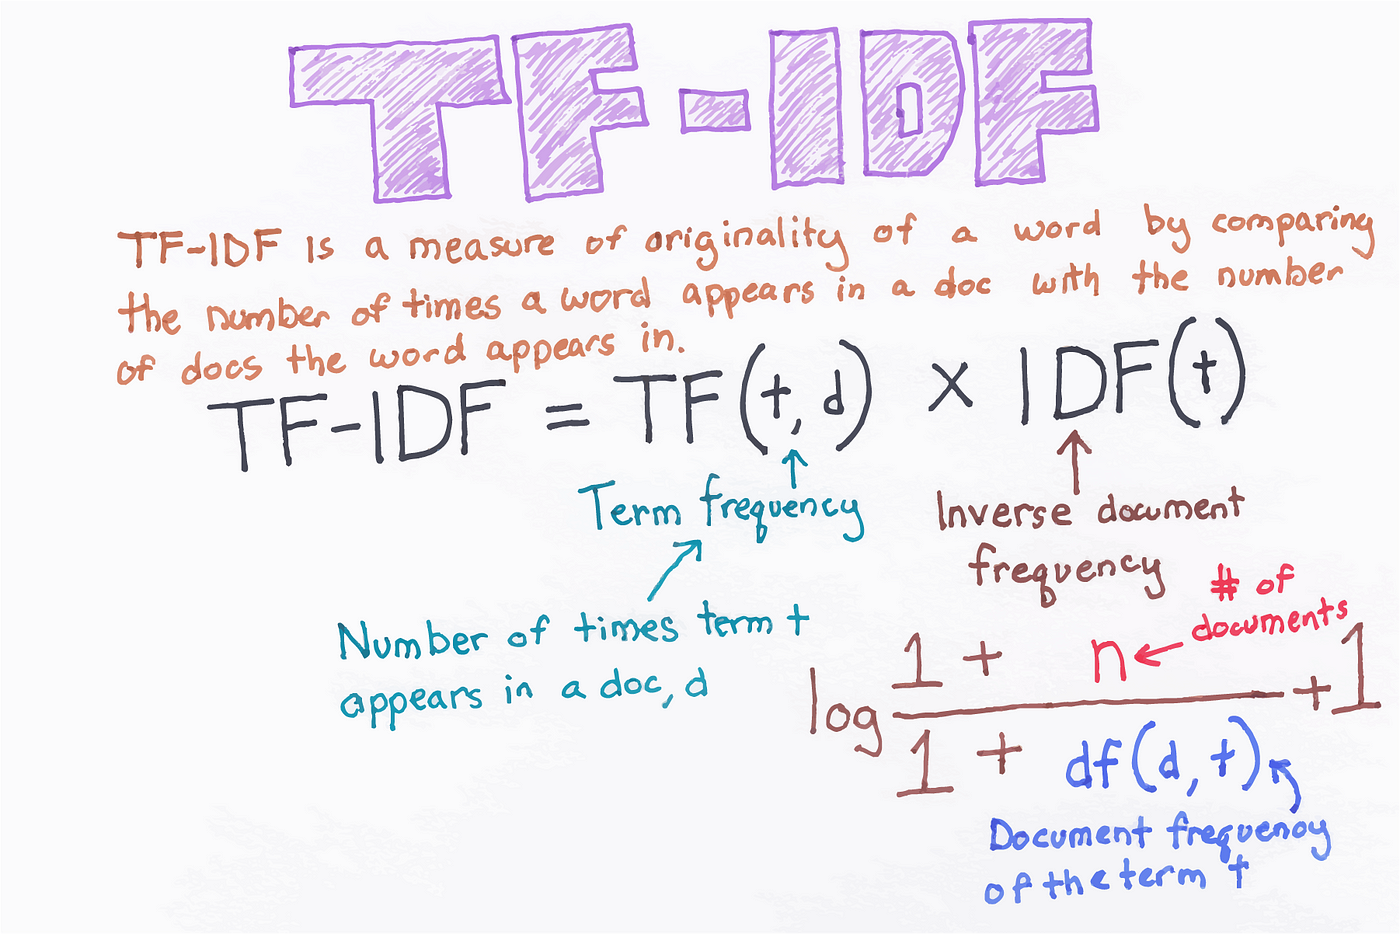

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 1. Extract the text data from the DataFrame
text_data = reviews['Review_Clean']#.head(1000)
# note that doing this for really large datasets may not be manageable
# we could then use other text / word representation techniques

# # 2. Initialize the CountVectorizer
# count_vectorizer = CountVectorizer(min_df=0.1)

# # 3. Fit and transform the text data using CountVectorizer
# bow_representation = count_vectorizer.fit_transform(text_data)

vectorizer = TfidfVectorizer(min_df=0.1, max_df=1.0)
bow_representation = vectorizer.fit_transform(text_data)

# 4. Convert the BoW matrix to a DataFrame
# bow_df = pd.DataFrame(bow_representation.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_df = pd.DataFrame(bow_representation.toarray(), columns=vectorizer.get_feature_names_out())


# 5. (Optional) Add the BoW DataFrame to your original DataFrame
df_with_bow = pd.concat([reviews, bow_df], axis=1)

In [50]:
bow_df

,also,always,amaze,around,attractions,back,best,better,big,character,...,wait,walk,want,way,well,world,worth,would,year,years
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.345119,0.000000,0.000000,0.32263,0.333542,0.341704,0.000000,0.000000,0.0
1,0.201741,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.166558,0.155294,0.334127,0.000000,0.0,0.000000,0.174155,0.00000,...,0.000000,0.000000,0.000000,0.174224,0.00000,0.000000,0.000000,0.127681,0.000000,0.0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.378712,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0.220446,0.0,0.000000,0.000000,0.000000,0.108966,0.0,0.126922,0.128871,0.11281,...,0.094624,0.120821,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
42652,0.000000,0.0,0.146858,0.000000,0.000000,0.000000,0.0,0.151234,0.000000,0.00000,...,0.000000,0.000000,0.277997,0.000000,0.00000,0.000000,0.000000,0.225159,0.000000,0.0
42653,0.173396,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.297266,0.184657,0.0
42654,0.410674,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0


<Axes: >

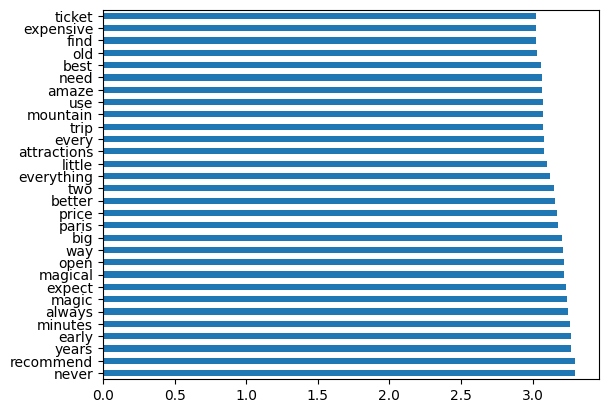

In [58]:
pd.Series(vectorizer.idf_, index=bow_df.columns).sort_values(ascending=False).head(30).plot(kind='barh')

In [59]:
df_with_bow

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Clean_List,Review_Clean,also,always,...,wait,walk,want,way,well,world,worth,would,year,years
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[ever, anywhere, find, hong, kong, similar, la...",ever anywhere find hong kong similar layout wa...,0.000000,0.0,...,0.000000,0.345119,0.000000,0.000000,0.32263,0.333542,0.341704,0.000000,0.000000,0.0
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[since, last, time, visit, hk, .., yet, time, ...",since last time visit hk .. yet time stay tomo...,0.201741,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[thank, god, hot, humid, visit, otherwise, wou...",thank god hot humid visit otherwise would big ...,0.000000,0.0,...,0.000000,0.000000,0.000000,0.174224,0.00000,0.000000,0.000000,0.127681,0.000000,0.0
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[hk, great, compact, unfortunately, quite, bit...",hk great compact unfortunately quite bite main...,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[location, city, take, around, hour, kowlon, k...",location city take around hour kowlon kid like...,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,"[go, paris, july, 03, think, brilliant, visit,...",go paris july 03 think brilliant visit hotels ...,0.220446,0.0,...,0.094624,0.120821,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,"[adults, child, 11, visit, paris, begin, feb, ...",adults child 11 visit paris begin feb 04 absol...,0.000000,0.0,...,0.000000,0.000000,0.277997,0.000000,0.00000,0.000000,0.000000,0.225159,0.000000,0.0
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,"[eleven, year, old, daughter, go, visit, son, ...",eleven year old daughter go visit son london d...,0.173396,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.297266,0.184657,0.0
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,"[hotel, part, paris, complex, wonderful, place...",hotel part paris complex wonderful place famil...,0.410674,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0


Guided Questions:
- Try removing the `min_df` parameter. What will happen?
- Change other params


## Clustering

In [60]:
X = bow_df

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

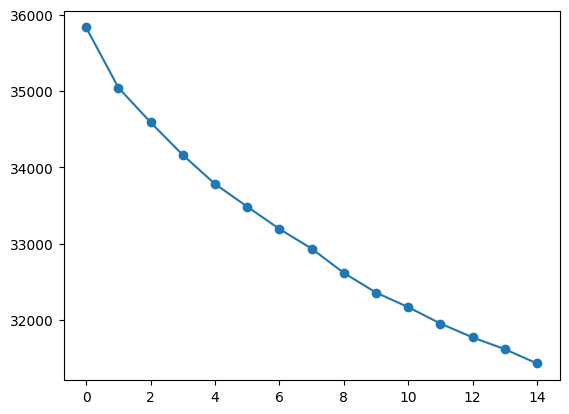

In [62]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,16):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

### Using Kneedle algorithm to computationally identify the point where elbow happens.

Yellowbrick library has a function for computing this. Here is the command for installing this:

`!pip install yellowbrick`

In [63]:
!pip install yellowbrick

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

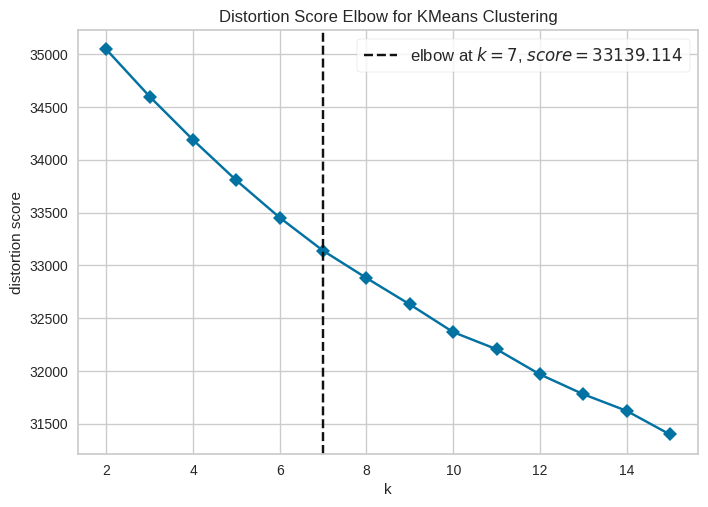

In [64]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,16), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

In [68]:
# Cluster using K-means
k = 7
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)
labels = km.predict(X)

# Create new dataframe with features and labels
X['cluster'] = labels

X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,also,always,amaze,around,attractions,back,best,better,big,character,...,walk,want,way,well,world,worth,would,year,years,cluster
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.345119,0.000000,0.000000,0.32263,0.333542,0.341704,0.000000,0.000000,0.0,1
1,0.201741,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,2
2,0.000000,0.0,0.166558,0.155294,0.334127,0.000000,0.0,0.000000,0.174155,0.00000,...,0.000000,0.000000,0.174224,0.00000,0.000000,0.000000,0.127681,0.000000,0.0,2
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,5
4,0.000000,0.0,0.000000,0.378712,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0.220446,0.0,0.000000,0.000000,0.000000,0.108966,0.0,0.126922,0.128871,0.11281,...,0.120821,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,6
42652,0.000000,0.0,0.146858,0.000000,0.000000,0.000000,0.0,0.151234,0.000000,0.00000,...,0.000000,0.277997,0.000000,0.00000,0.000000,0.000000,0.225159,0.000000,0.0,6
42653,0.173396,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.297266,0.184657,0.0,6
42654,0.410674,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0


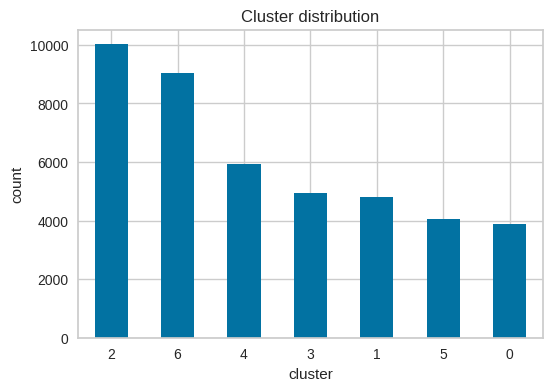

In [69]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=100)
X['cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Cluster distribution')
plt.show()

### Interpreting clusters

#### Cluster 2

Had a great time!

In [100]:
k = 2
X.query(f"cluster=={k}").drop('cluster', axis=1).mean().sort_values(ascending=False).head(10)

great    0.095007
rid      0.081817
fun      0.077936
time     0.065972
day      0.065772
kid      0.061620
show     0.061423
food     0.057310
enjoy    0.055960
good     0.055720
dtype: float64

In [89]:
index = X.query(f"cluster=={2}").index
for i, text in df_with_bow.loc[index, 'Review_Text'].head(10).iteritems():
  print(i, text)

1 Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!
2 Thanks God it wasn   t to

<ipython-input-89-3b00563762b4>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, text in df_with_bow.loc[index, 'Review_Text'].head(10).iteritems():


#### Cluster 6

Reviews about the rides.

In [93]:
X.query(f"cluster=={6}").drop('cluster', axis=1).mean().sort_values(ascending=False).head(10)

go       0.210274
get      0.131273
time     0.120124
day      0.102354
would    0.094550
rid      0.090468
one      0.081562
take     0.072736
ride     0.068944
back     0.067951
dtype: float64

In [91]:
index = X.query(f"cluster=={6}").index
for i, text in df_with_bow.loc[index, 'Review_Text'].head(10).iteritems():
  print(i, text)

12 We spend two days, the second day went early then went straight to the back of the park, no lineups for so children got to go on many rides, some twice in a row. This Disneyland is very suitable for young children ours were 7,6,5,4,3 and 1 so most of them could go on all the rides, it was disappointing the castle was closed no nightly fireworks. Would not like to go in the hot season.
15 We brought tickets before we left and got 2 days for less than the price of 1. After visiting would advise everyone to look for an online deal not worth the walk up price. Castle was closed due to that area being refurbished and altered, weekday aprox no more than a 30 min wait for rides with most being less than that would not recommend weekends or holidays. As has been said like all Disney parks and theme parks in general food and drink is expensive .This is a small park and can easily be done in 1 day
17 Around   60 per person and if you want to eat or drink at any point it was cost you a small f

<ipython-input-91-58bcfe5bbd91>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, text in df_with_bow.loc[index, 'Review_Text'].head(10).iteritems():


### Exercise:

1. Interpret the remaining clusters
2. What's the output if we use CountVectorizer? Do we get a better clustering?

## References

1. TF-IDF Vectorizer scikit-learn image from https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a